<h3>eigen images is a special technique of extracting features using principle component analysis</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from glob import glob
%matplotlib inline

loading numpy zip

In [2]:
data=np.load('./data/data_100_100_norm.npz')

In [3]:
data.files

['arr_0', 'arr_1']

arr[0]=x, arr[1]=y

In [4]:
x= data['arr_0'] #independent features
y= data['arr_1'] #target values

In [5]:
x.shape, y.shape

((5459, 10000), (5459,))

<h3>creating eigen images</h3>

In [8]:
#subtracting all the columns with the mean
x1=x-x.mean(axis=0)

In [9]:
#applying PCA
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=None, whiten=True, svd_solver='auto') 

In [11]:
x_pca=pca.fit_transform(x1)

In [12]:
x_pca.shape

(5459, 5459)

we need to select which eigen values are important

In [13]:
# identify important directions using pca
eigen_ratio=pca.explained_variance_ratio_
eigen_ratio_sum=np.cumsum(eigen_ratio)

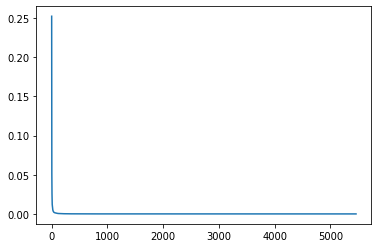

In [14]:
plt.plot(eigen_ratio)

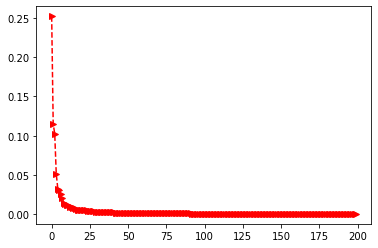

In [15]:
plt.plot(eigen_ratio[:200], 'r>--')

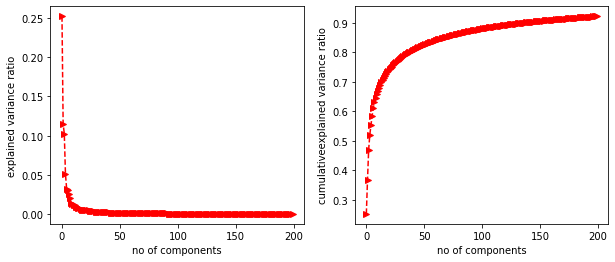

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no of components')
plt.ylabel('explained variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no of components')
plt.ylabel('cumulativeexplained variance ratio')
plt.plot(eigen_ratio_sum[:200],'r>--')
plt.show()

if we consider 50 components, we'll have nearly 80% of the variance in the data<br>
so instead considering 10,000 components, we can select just 50 components and can get 80% of information

In [17]:
pca_50 = PCA(n_components=50, whiten=True, svd_solver='auto') 
x_pca_50=pca_50.fit_transform(x1)

In [18]:
x_pca_50.shape

(5459, 50)

we have successfully reduced the dimensions using pca

In [23]:
#saving pca
import pickle
pickle.dump(pca_50,open('./model/pca_50.pickle','wb'))

In [19]:
#consider 50 images and inverse transform
#converting back pca
x_pca_inv=pca_50.inverse_transform(x_pca_50)

In [20]:
x_pca_inv.shape

(5459, 10000)

in the above 10000 directions, we are getting only 50 direction and rest are put to 0

In [21]:
# considering one image (one row)
eig_img=x_pca_inv[0,:] #0th col and all rows
eig_img=eig_img.reshape((100,100))
eig_img.shape

(100, 100)

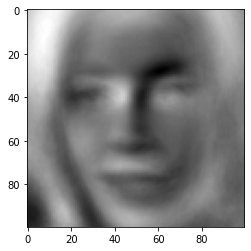

In [22]:
plt.imshow(eig_img,cmap='gray')

In [24]:
#saving eigen images
np.savez("./data/data_pca_50_y_mean.pickle",x_pca_50,y,x.mean(axis=0))